##  PROJECT 3

KARTIK CHOPRA

In [1]:
!pip3 install nltk

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the CSV

In [3]:
data = pd.read_csv('IMDB_dataset.csv')

## Data Processing

In [4]:
data.head()

,review,sentiment
0,I thought this was a wonderful way to spend ti...,positive
1,"Probably my all-time favorite movie, a story o...",positive
2,I sure would like to see a resurrection of a u...,positive
3,"This show was an amazing, fresh & innovative i...",negative
4,Encouraged by the positive comments about this...,negative


In [5]:
print("number if Rows",data.shape[0])
print("Number of Columsn", data.shape[1])

number if Rows 25000
Number of Columsn 2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


## Checking Null Values

In [7]:
print("any missing vlues?", data.isnull().values.any())

any missing vlues? False


In [8]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [9]:
per_missing= data.isnull().sum() * 100/ len(data)
per_missing

review       0.0
sentiment    0.0
dtype: float64

In [10]:
data.columns

Index(['review', 'sentiment'], dtype='object')

## Downloading the required ntkl Packages

In [11]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/hi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preprocess Text DataRemove punctuation, Perform Tokenization, Remove stopwords and Lemmatize/Stem

In [12]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    # Join tokens back to a single string
    return ' '.join(tokens)

data['processed_review'] = data['review'].apply(preprocess_text)
print("Data preprocessing completed.")


[nltk_data] Downloading package punkt to /Users/hi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data preprocessing completed.


Text Cleaning
1) Remove punctuation: Strip all punctuation from the reviews.
2) Tokenization: Split the text into individual words or tokens.
3) Remove stopwords: Filter out common words that are usually ignored in NLP (e.g., "and", "the").
4) Lemmatize/Stem: Reduce words to their root form or base.

## TFIDF Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_review']).toarray()

print("TFIDF vectorization completed.")


TFIDF vectorization completed.


Transforms preprocessed reviews into TF-IDF feature matrices. TF-IDF reveals words that appear often in a document but not across documents. This stage transforms text data into a format appropriate for machine learning models.

## GridSearchCV on Random Forest.

In [14]:
from sklearn.model_selection import train_test_split

y = data['sentiment'].map({'positive': 1, 'negative': 0}).values
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")


Data split into training and testing sets.


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200], 
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found:  {'max_depth': None, 'n_estimators': 200}


Fits a model with GridSearchCV, which searches for an estimator based on supplied parameter values. It repeatedly trains the model with different parameters to find the optimal combination, hence boosting model performance.

## Evaluation of Accuracy score, Precision score, Recall score, F1 score

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.8484
Precision: 0.8450704225352113
Recall: 0.8491710473109584
F1 Score: 0.8471157724889068
[CV] END ...................max_depth=None, n_estimators=200; total time=12.5min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.9min
[CV] END .....................max_depth=10, n_estimators=200; total time= 7.7min
[CV] END ...................max_depth=None, n_estimators=200; total time=12.7min
[CV] END .....................max_depth=10, n_estimators=100; total time= 2.7min
[CV] END .....................max_depth=10, n_estimators=200; total time= 5.0min
[CV] END .....................max_depth=20, n_estimators=100; total time= 5.0min
[CV] END ...................max_depth=None, n_estimators=200; total time=12.7min
[CV] END ...................max_depth=None, n_estimators=100; total time= 4.9min
[CV] END .....................max_depth=20, n_estimators=100; total time= 6.7min
[CV] END .....................max_depth=20, n_estimators=200; total time= 1.5min
[CV] E

Calculates and outputs the model's accuracy, which is the percentage of accurately predicted cases. It assesses the model's performance on the test set, revealing how effectively the model generalises to new data.

## Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

print("Gradient Boosting Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier Results
Accuracy: 0.8428
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2527
           1       0.83      0.86      0.84      2473

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



Gradient Boosting Classifier using the training data. Gradient Boosting creates a sequence of decision trees, each fixing faults caused by prior trained trees, to enhance prediction accuracy.

## The best performing model

In [24]:
print("The Random Forest Classifier with the best hyperparameters provides an accuracy of {:.2f}% on the test set.".format(accuracy * 100))
print("This project demonstrates the effectiveness of text preprocessing, TFIDF vectorization, and machine learning models in sentiment analysis.")


The Random Forest Classifier with the best hyperparameters provides an accuracy of 84.84% on the test set.
This project demonstrates the effectiveness of text preprocessing, TFIDF vectorization, and machine learning models in sentiment analysis.


## Trade-off between precision and recall

In [20]:
import numpy as np  
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt


y_scores = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

thresholds = np.append(thresholds, 1)


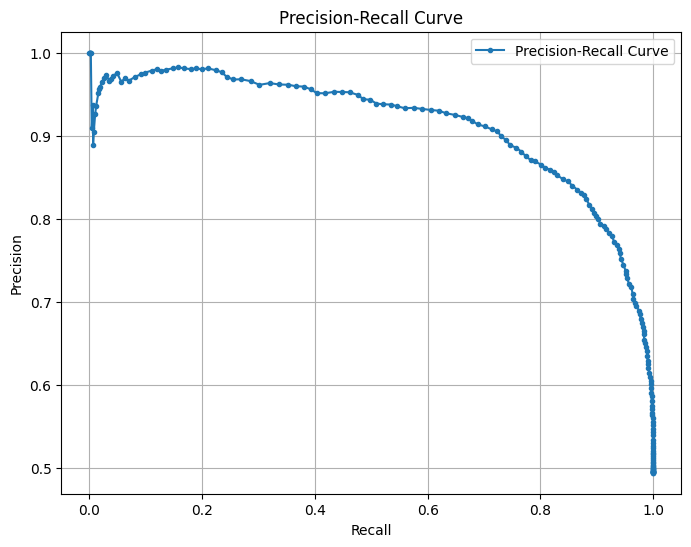

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


Plots the precision-recall curve, which depicts the trade-off between precision (the accuracy of positive predictions) and recall (the capacity to discover all positive cases) at various thresholds. Useful for assessing binary classifiers, particularly on skewed datasets.